# 2-bit Multiplication

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc

In [3]:
backend = Aer.get_backend('statevector_simulator')

0000


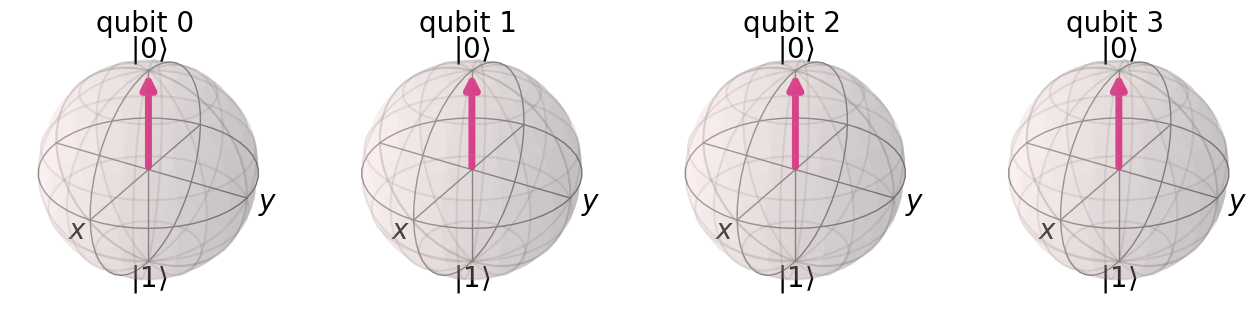

In [4]:
circ = makeCirc(4, 1)
getBloch(circ, backend)

In [5]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

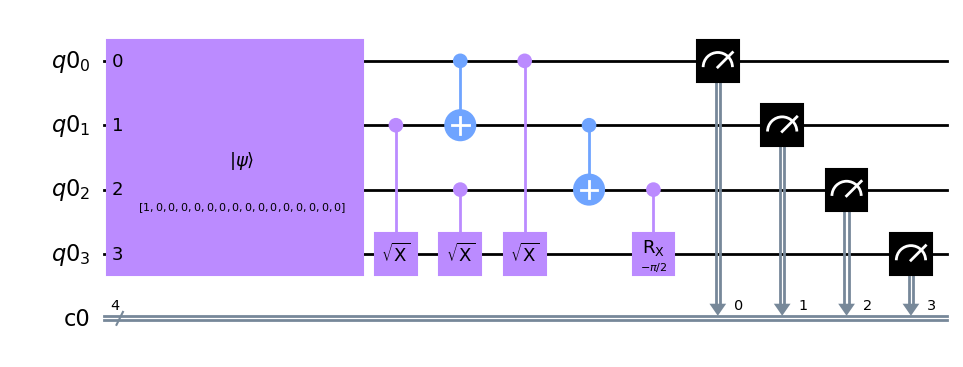

In [6]:
circ.draw('mpl')

In [7]:
getMeasure(circ, 1, backend)[0][::-1]

'0000'

In [8]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [9]:
fullAdder = circ.to_gate(label=' Adder')

In [10]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

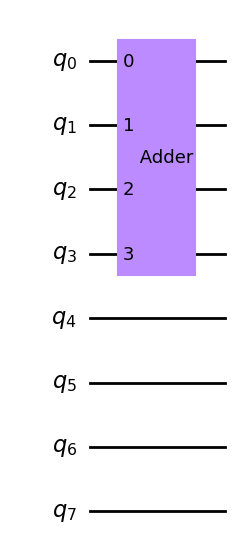

In [11]:
circ2.draw('mpl')

In [12]:
def mult(a1, a2):
    qubits = len(a1) + len(a2) + 10
    qr = QuantumRegister(qubits)
    qc = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '0000000000')
    circuit.initialize(initializedState, qr)
    
    circuit.ccx(0, 2, 4)
    circuit.ccx(0, 3, 8)
    circuit.ccx(1, 2, 9)
    circuit.ccx(1, 3, 11)
    
    circuit.append(fullAdder, [4, 5, 6, 7])
    circuit.append(fullAdder, [8, 9, 7, 10])
    circuit.append(fullAdder, [11, 12, 10, 13])
    
    for i in range(6, qubits):
        circuit.measure(i, i)
    return circuit

In [13]:
a = '11' # 3
b = '11' # 3
#'1001' = 9

In [14]:
circ = mult(a, b)

In [19]:
def getResult(circ):
    result = getMeasure(circ, 1, backend)[0][::-1]
    newResult = result[13] + result[10] + result[7] + result[6]
    return newResult

In [20]:
getResult(circ)

'1001'

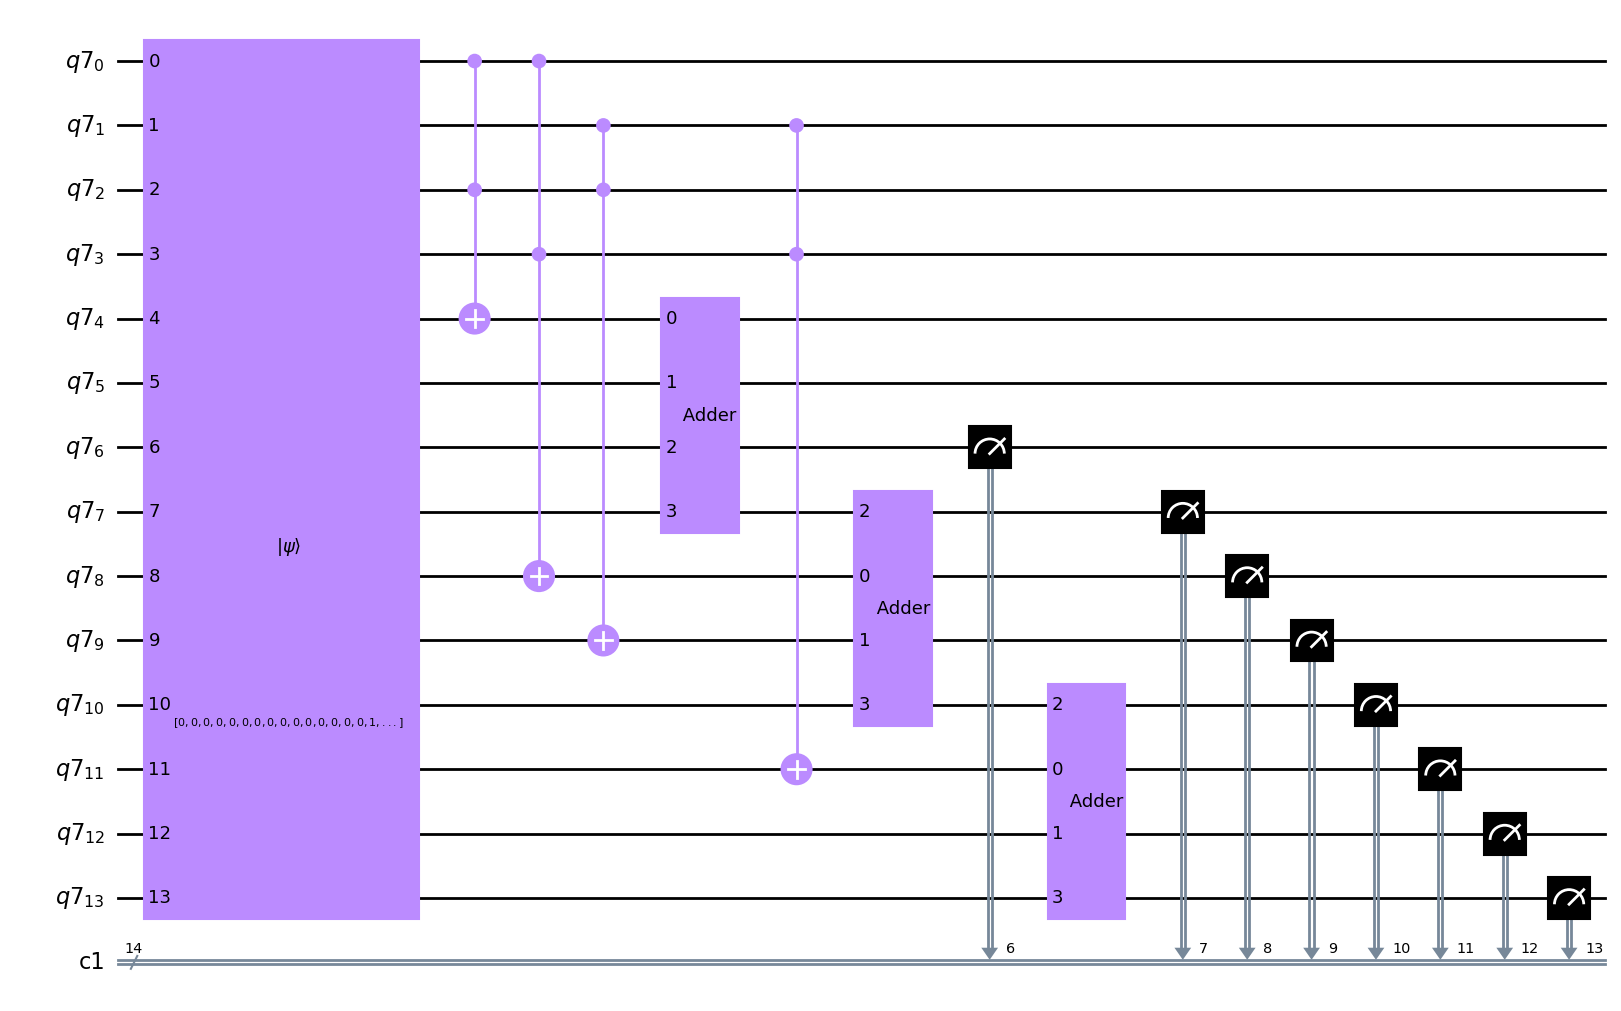

In [22]:
circ.draw('mpl')